In [613]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC

from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils.metaestimators import available_if
from sklearn.utils.validation import check_is_fitted

from catboost import CatBoostClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

import xgboost as xgb
from matplotlib import rcParams
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

import os
os.system(f'date')

sex 03 mar 2023 18:05:42 -03


0

### References

- [Agglomerative Hierarchical Clustering in Python with Scikit-Learn](https://stackabuse.com/bytes/agglomerative-hierarchical-clustering-with-scikit-learn/)
- [K-Means Clustering in Python: A Practical Guide](https://realpython.com/k-means-clustering-python/#hierarchical-clustering)
- [Hierarchical Clustering](https://realpython.com/k-means-clustering-python/#hierarchical-clustering)
- [Definitive Guide to Hierarchical Clustering with Python and Scikit-Learn](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)
- [Hierarchical Agglomerative Clustering Algorithm Example In Python](https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019)

## Data Dictionary

The raw dataset consists of 21 unique features and 1,048,576 unique patients. 
**In the Boolean features, 1 means "yes" and 2 means "no". Values as 97 and 99 are missing data.**

 - sex: 1 for female and 2 for male.
 - age: of the patient.
 - classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 
   4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
 - patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
 - pneumonia: whether the patient already have air sacs inflammation or not.
 - pregnancy: whether the patient is pregnant or not.
 - diabetes: whether the patient has diabetes or not.
 - copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
 - asthma: whether the patient has asthma or not.
 - inmsupr: whether the patient is immunosuppressed or not.
 - hypertension: whether the patient has hypertension or not.
 - cardiovascular: whether the patient has heart or blood vessels related disease.
 - renal chronic: whether the patient has chronic renal disease or not.
 - other disease: whether the patient has other disease or not.
 - obesity: whether the patient is obese or not.
 - tobacco: whether the patient is a tobacco user.
 - usmr: Indicates whether the patient treated medical units of the first, second or third level.
 - medical unit: type of institution of the National Health System that provided the care.
 - intubed: whether the patient was connected to the ventilator.
 - icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [614]:
df_covid = pd.read_csv('../dataset/datacovid.csv')
df_covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


As we know values having 97, 98 or 99 are considered as null and as per above cell, we can see INTUBED, PREGNANT and ICU fields have huge amount of null values. So we will remove the records for other fields and will analyze these three fields seperately

In [615]:
# creating a new cloumn based on the column 'DATE_DIED'
# DATE is e.g. 15/02/2020 - True(Died), otherwise is False(Alive).
df_covid['ALIVE_OR_DIED'] = np.where(df_covid['DATE_DIED']!= '9999-99-99', '1', '2')
df_covid['ALIVE_OR_DIED']

0          1
1          1
2          1
3          1
4          1
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: ALIVE_OR_DIED, Length: 1048575, dtype: object

In [616]:
df_covid = df_covid.drop(columns='DATE_DIED') # drop column - DATE_DIED
df_covid['ALIVE_OR_DIED'] = df_covid['ALIVE_OR_DIED'].astype('int64')

In [617]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   INTUBED               1048575 non-null  int64
 5   PNEUMONIA             1048575 non-null  int64
 6   AGE                   1048575 non-null  int64
 7   PREGNANT              1048575 non-null  int64
 8   DIABETES              1048575 non-null  int64
 9   COPD                  1048575 non-null  int64
 10  ASTHMA                1048575 non-null  int64
 11  INMSUPR               1048575 non-null  int64
 12  HIPERTENSION          1048575 non-null  int64
 13  OTHER_DISEASE         1048575 non-null  int64
 14  CARDIOVASCULAR        1048575 non-null  int64
 15  OBESITY        

In [618]:
df_covid_all = df_covid
df_covid_all

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,ALIVE_OR_DIED
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,...,2,2,2,2,2,2,2,7,97,2
1048571,1,13,2,2,2,2,51,97,2,2,...,2,1,2,2,2,2,2,7,2,2
1048572,2,13,2,1,97,2,55,97,2,2,...,2,2,2,2,2,2,2,7,97,2
1048573,2,13,2,1,97,2,28,97,2,2,...,2,2,2,2,2,2,2,7,97,2


In [619]:
df_covid.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
ALIVE_OR_DIED             2
dtype: int64

In [620]:
df_covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU',
       'ALIVE_OR_DIED'],
      dtype='object')

In [621]:
# Checking the fields and getting count of missing value records for each field.
for i in df_covid.columns:
    df_temp = df_covid[(df_covid[i] == 99) | (df_covid[i] == 97) | (df_covid[i] == 98)]
    print(i + " : ", df_temp[i].count())

USMER :  0
MEDICAL_UNIT :  0
SEX :  0
PATIENT_TYPE :  0
INTUBED :  855869
PNEUMONIA :  16003
AGE :  345
PREGNANT :  527265
DIABETES :  3338
COPD :  3003
ASTHMA :  2979
INMSUPR :  3404
HIPERTENSION :  3104
OTHER_DISEASE :  5045
CARDIOVASCULAR :  3076
OBESITY :  3032
RENAL_CHRONIC :  3006
TOBACCO :  3220
CLASIFFICATION_FINAL :  0
ICU :  856032
ALIVE_OR_DIED :  0


In [622]:
# INTUBED, PREGNANT and ICU fields have huge amount of null values
# remove the records for other fields
df_covid = df_covid[(df_covid.PNEUMONIA == 1) | (df_covid.PNEUMONIA == 2)]
df_covid = df_covid[(df_covid.DIABETES == 1) |  (df_covid.DIABETES == 2)]
df_covid = df_covid[(df_covid.COPD == 1) |      (df_covid.COPD == 2)]
df_covid = df_covid[(df_covid.ASTHMA == 1) |    (df_covid.ASTHMA == 2)]
df_covid = df_covid[(df_covid.INMSUPR == 1) |   (df_covid.INMSUPR == 2)]
df_covid = df_covid[(df_covid.HIPERTENSION == 1) |  (df_covid.HIPERTENSION == 2)]
df_covid = df_covid[(df_covid.OTHER_DISEASE == 1) | (df_covid.OTHER_DISEASE == 2)]
df_covid = df_covid[(df_covid.CARDIOVASCULAR == 1) |(df_covid.CARDIOVASCULAR == 2)]
df_covid = df_covid[(df_covid.OBESITY == 1) |       (df_covid.OBESITY == 2)]
df_covid = df_covid[(df_covid.RENAL_CHRONIC == 1) | (df_covid.RENAL_CHRONIC == 2)]
df_covid = df_covid[(df_covid.TOBACCO == 1) |  (df_covid.TOBACCO == 2)]

In [623]:
for i in df_covid.columns:
    df_temp = df_covid[(df_covid[i] == 99) | (df_covid[i] == 97) | (df_covid[i] == 98)]
    print(i + " : ",df_temp[i].count())

USMER :  0
MEDICAL_UNIT :  0
SEX :  0
PATIENT_TYPE :  0
INTUBED :  835406
PNEUMONIA :  0
AGE :  323
PREGNANT :  515111
DIABETES :  0
COPD :  0
ASTHMA :  0
INMSUPR :  0
HIPERTENSION :  0
OTHER_DISEASE :  0
CARDIOVASCULAR :  0
OBESITY :  0
RENAL_CHRONIC :  0
TOBACCO :  0
CLASIFFICATION_FINAL :  0
ICU :  835564
ALIVE_OR_DIED :  0


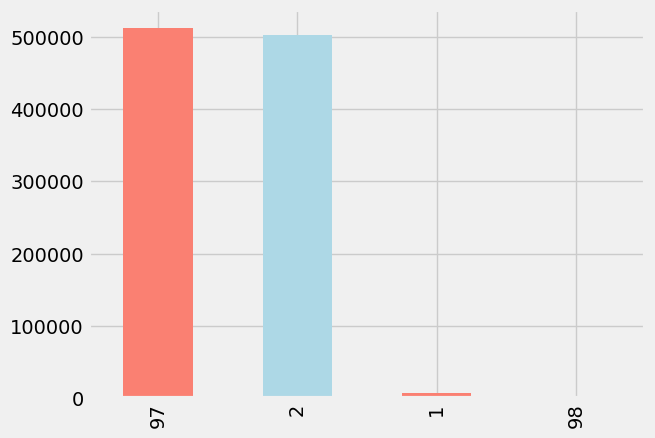

In [624]:
# Checking the count of unique vales of pregnant field.
df_covid['PREGNANT'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '97'), Text(3, 0, '98')])

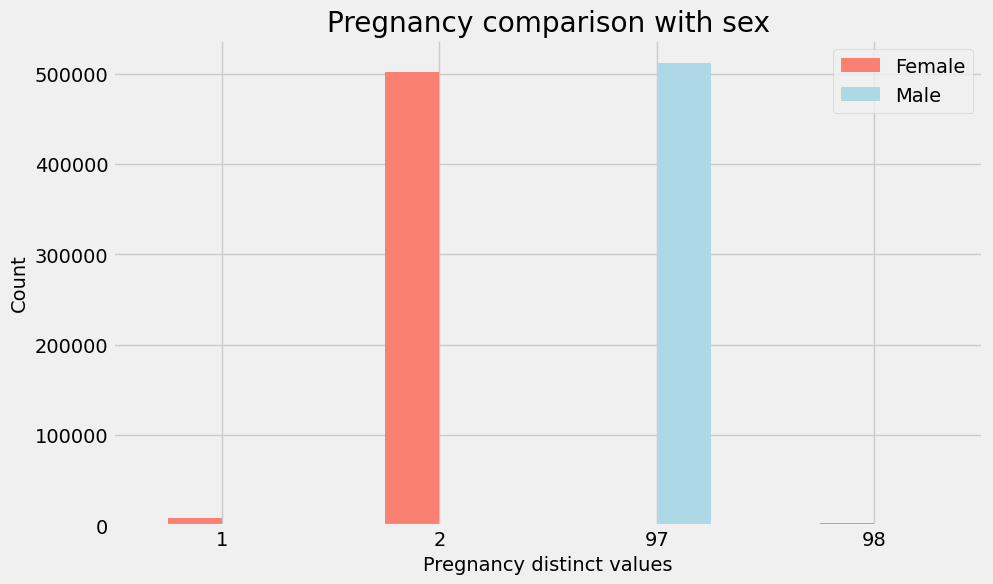

In [625]:
# Checking the count of unique vales of pregnant field on the basis of sex.
pd.crosstab(df_covid.PREGNANT, df_covid.SEX).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Pregnancy comparison with sex")
plt.xlabel("Pregnancy distinct values")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [626]:
#  97 as the value is of male and male can't get pregnant 
# so moving all these records to not pregnant(2 value)
df_covid['PREGNANT'] = df_covid['PREGNANT'].replace(97,2)

In [627]:
df_covid['PREGNANT'].value_counts()

2     1014136
1        7841
98       3175
Name: PREGNANT, dtype: int64

In [628]:
# Removing the records from the pregnant field with values as 98.
df_covid = df_covid[(df_covid.PREGNANT == 1) | (df_covid.PREGNANT == 2)]

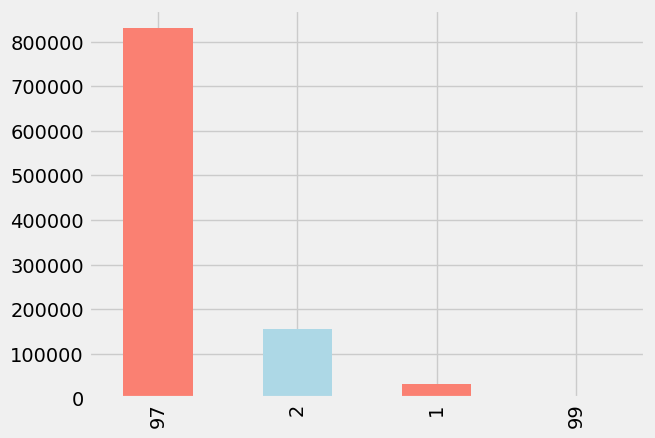

In [629]:
# Checking the count of unique vales of intubed field.
df_covid['INTUBED'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

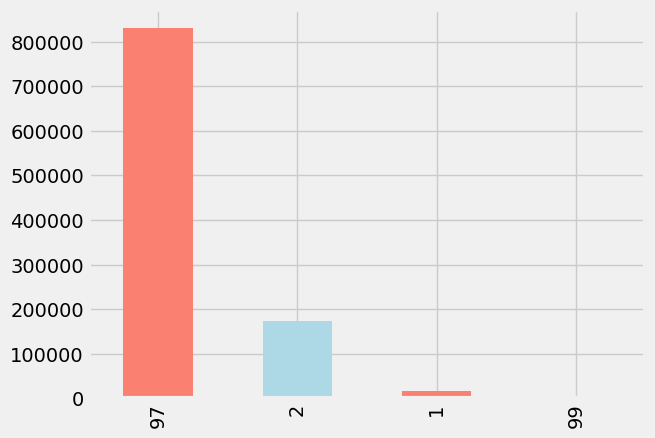

In [630]:
# Checking the count of unique vales of icu field.
df_covid['ICU'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [631]:
# INTUBED and ICU fields are having huge amount of missing data - drop
df_covid.drop(columns=["INTUBED","ICU"], inplace=True)

In [632]:
df_covid['ALIVE_OR_DIED'].value_counts()

2    947320
1     74657
Name: ALIVE_OR_DIED, dtype: int64

In [633]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021977 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1021977 non-null  int64
 1   MEDICAL_UNIT          1021977 non-null  int64
 2   SEX                   1021977 non-null  int64
 3   PATIENT_TYPE          1021977 non-null  int64
 4   PNEUMONIA             1021977 non-null  int64
 5   AGE                   1021977 non-null  int64
 6   PREGNANT              1021977 non-null  int64
 7   DIABETES              1021977 non-null  int64
 8   COPD                  1021977 non-null  int64
 9   ASTHMA                1021977 non-null  int64
 10  INMSUPR               1021977 non-null  int64
 11  HIPERTENSION          1021977 non-null  int64
 12  OTHER_DISEASE         1021977 non-null  int64
 13  CARDIOVASCULAR        1021977 non-null  int64
 14  OBESITY               1021977 non-null  int64
 15  RENAL_CHRONIC  

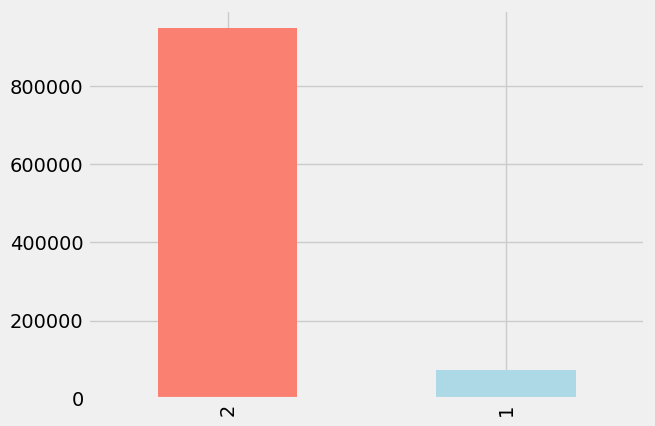

In [634]:
# Checking the count of unique vales of DEAD field.
df_covid['ALIVE_OR_DIED'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [635]:
# data imbalance - Next thing to do!

Text(0.5, 1.0, 'Distribution - Age')

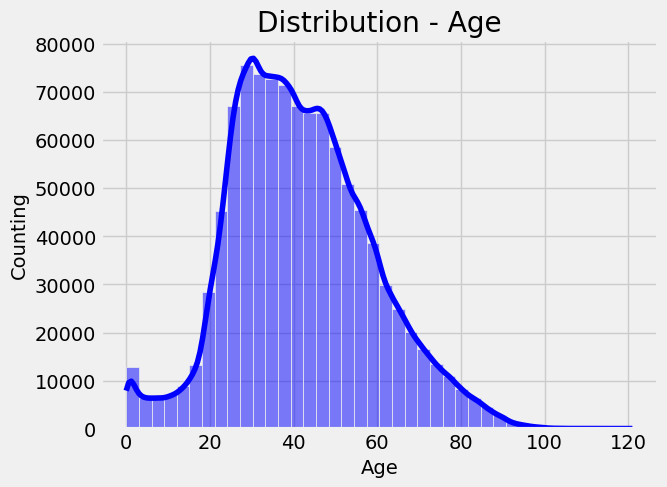

In [636]:
sns.histplot(data=df_covid, x="AGE", bins=40, kde=True, color="blue")
plt.xlabel('Age')
plt.ylabel('Counting')
plt.title('Distribution - Age')

Text(0.5, 1.0, 'Death of the patients according to age')

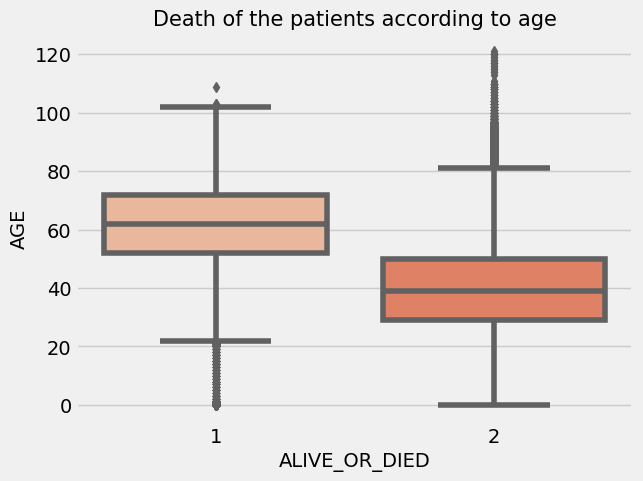

In [637]:
sns.boxplot(x="ALIVE_OR_DIED", y="AGE",data=df_covid,palette=sns.color_palette("rocket_r"))
plt.title("Death of the patients according to age",fontsize=15)

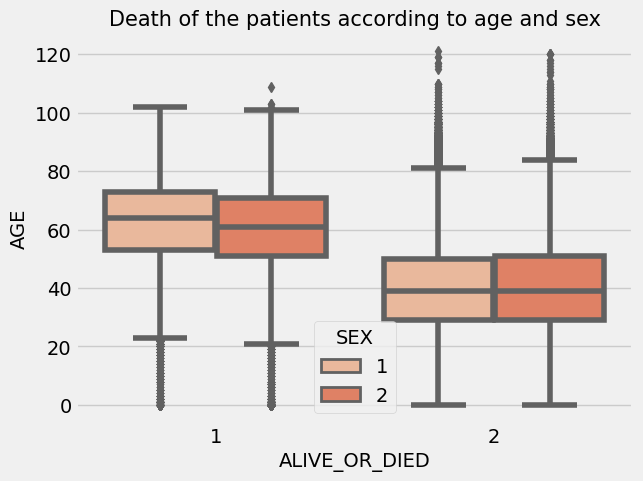

In [638]:
sns.boxplot(x="ALIVE_OR_DIED", y="AGE",data=df_covid,palette=sns.color_palette("rocket_r"), hue='SEX')
plt.title("Death of the patients according to age and sex",fontsize=15);

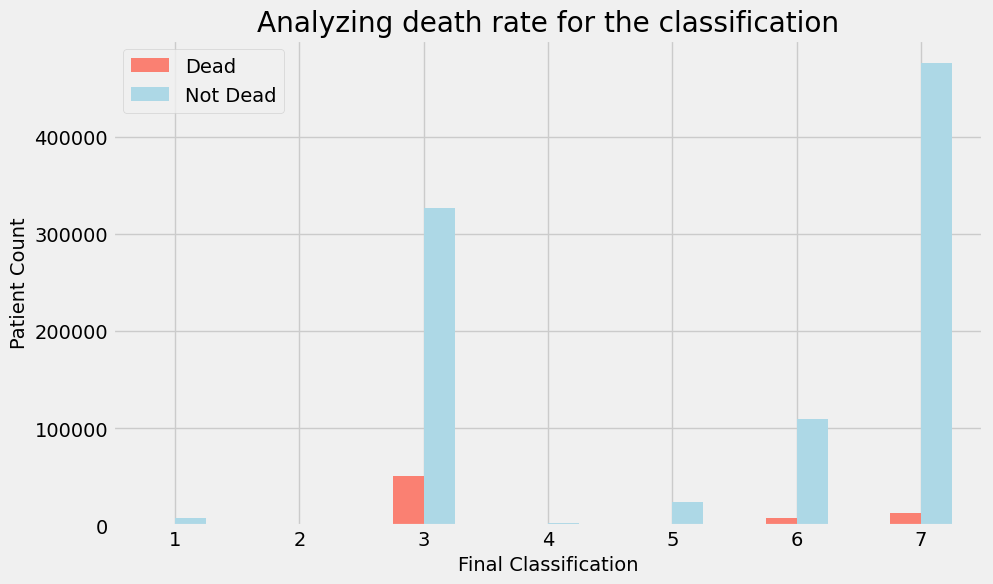

In [639]:
pd.crosstab(df_covid.CLASIFFICATION_FINAL, df_covid.ALIVE_OR_DIED).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate for the classification")
plt.xlabel("Final Classification")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

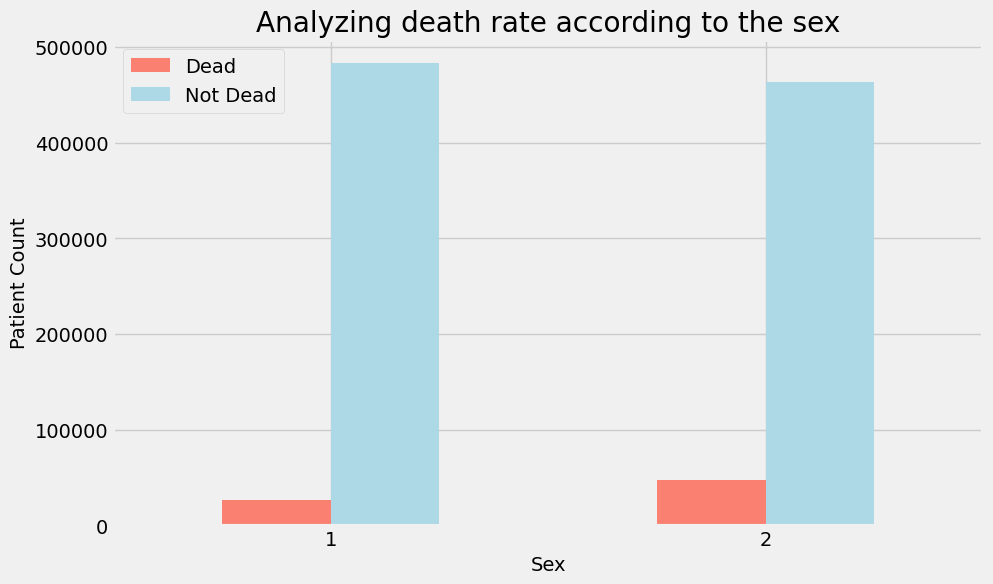

In [640]:
pd.crosstab(df_covid.SEX, df_covid.ALIVE_OR_DIED).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate according to the sex")
plt.xlabel("Sex")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

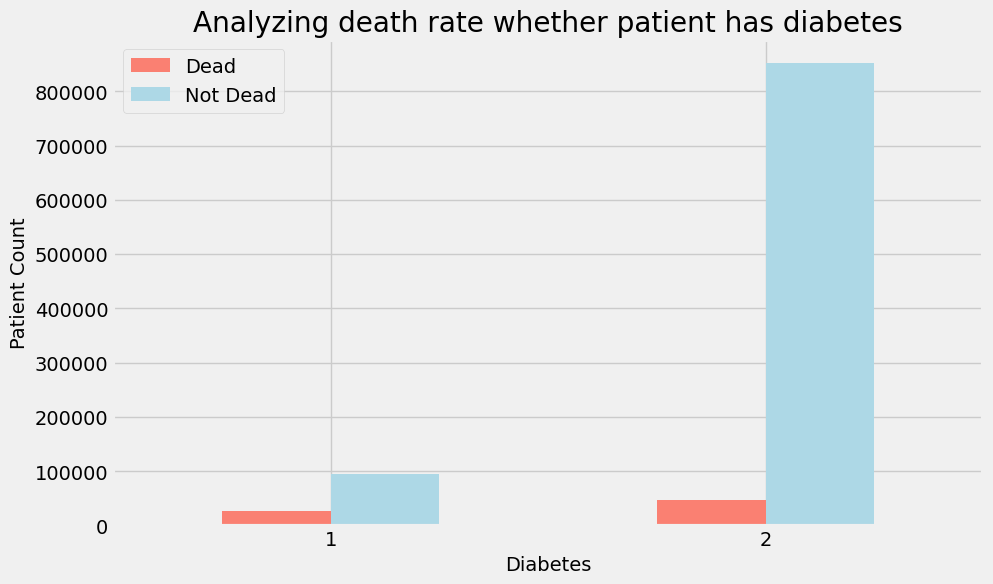

In [641]:
pd.crosstab(df_covid.DIABETES, df_covid.ALIVE_OR_DIED).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0)

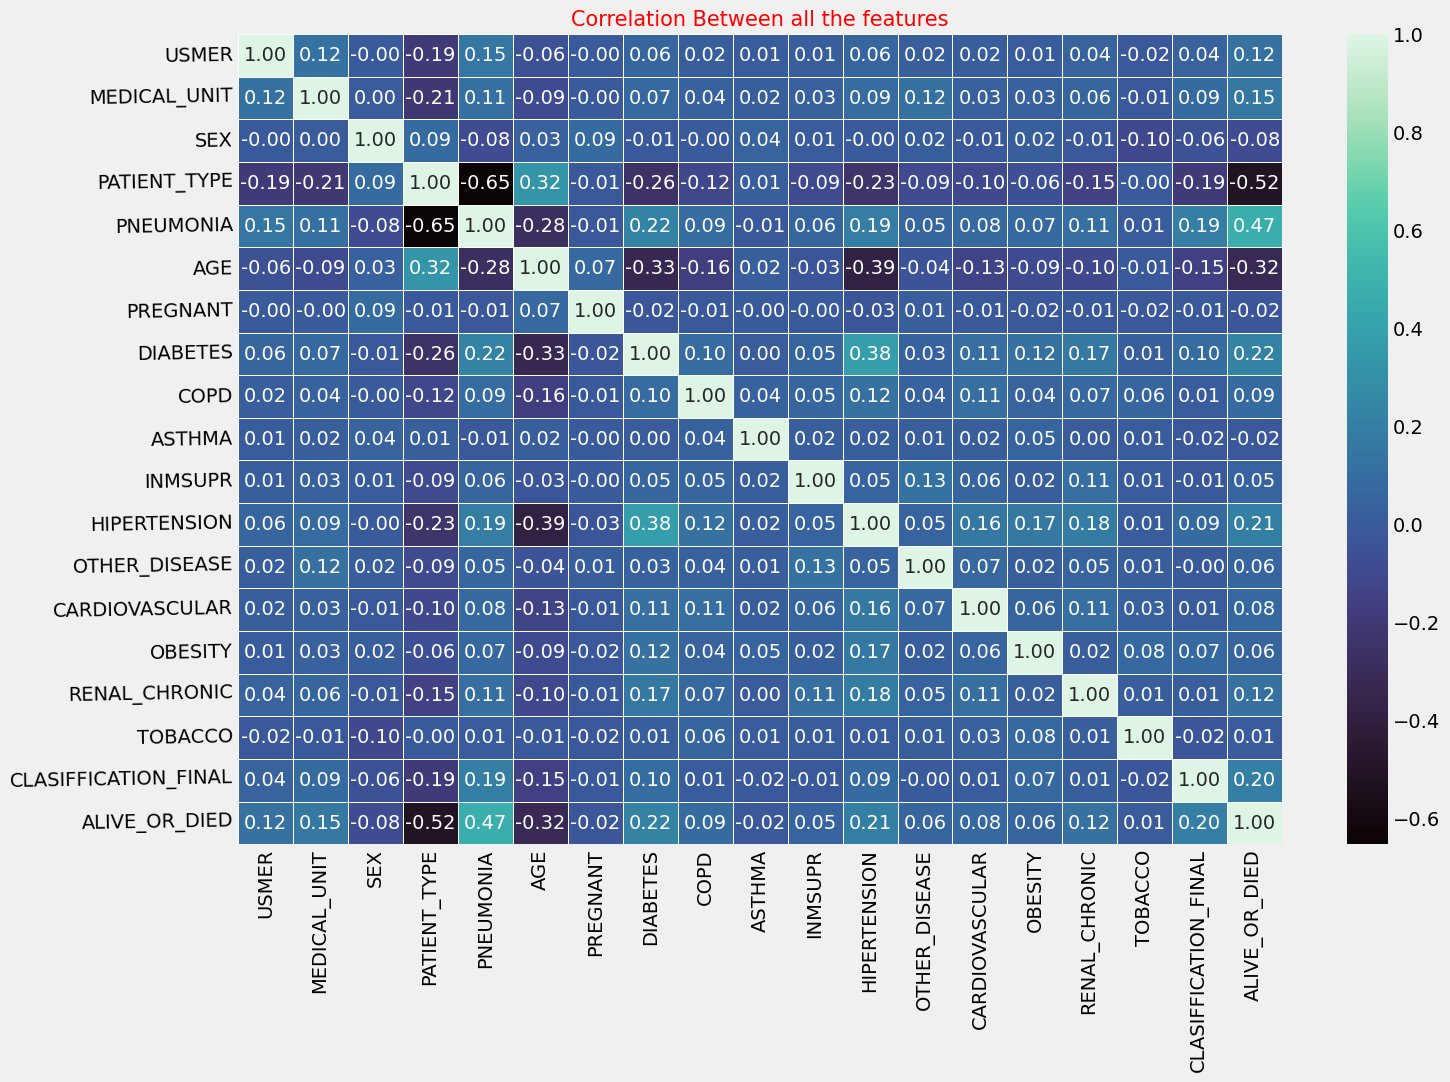

In [642]:
corr_matrix = df_covid.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="mako")
plt.yticks(rotation=1)
plt.title("Correlation Between all the features", fontsize=15, c='red');

In [643]:
df_covid.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ALIVE_OR_DIED           0
dtype: int64

In [644]:
cor_target = abs(corr_matrix["ALIVE_OR_DIED"])

features_selected = dict(cor_target[cor_target>0.1])
list_features_selected = list(features_selected.keys())
list_features_selected

['USMER',
 'MEDICAL_UNIT',
 'PATIENT_TYPE',
 'PNEUMONIA',
 'AGE',
 'DIABETES',
 'HIPERTENSION',
 'RENAL_CHRONIC',
 'CLASIFFICATION_FINAL',
 'ALIVE_OR_DIED']

In [645]:
cols_to_drop = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df_covid.drop(columns=cols_to_drop,inplace=True)

In [646]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021977 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1021977 non-null  int64
 1   MEDICAL_UNIT          1021977 non-null  int64
 2   PATIENT_TYPE          1021977 non-null  int64
 3   PNEUMONIA             1021977 non-null  int64
 4   AGE                   1021977 non-null  int64
 5   DIABETES              1021977 non-null  int64
 6   HIPERTENSION          1021977 non-null  int64
 7   RENAL_CHRONIC         1021977 non-null  int64
 8   CLASIFFICATION_FINAL  1021977 non-null  int64
 9   ALIVE_OR_DIED         1021977 non-null  int64
dtypes: int64(10)
memory usage: 85.8 MB


In [647]:
# robust scaling as we have outliers in the data and it has managed to bring the mean to 0.
robust_scaler = preprocessing.RobustScaler()
df_covid.AGE = robust_scaler.fit_transform(df_covid.AGE.values.reshape(-1,1))

Text(0.5, 1.0, 'Distribution - Age')

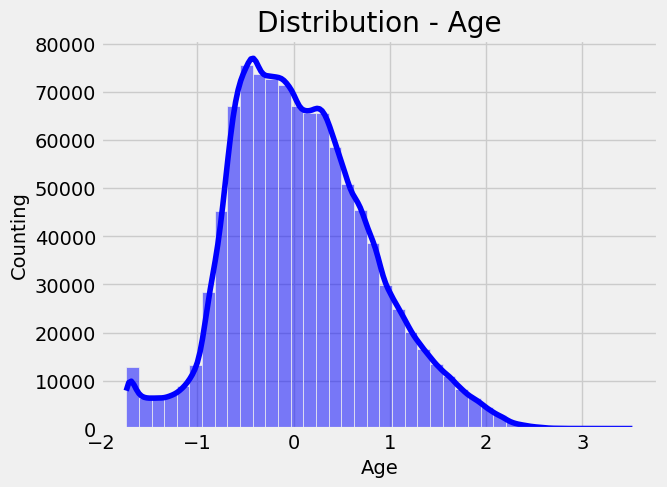

In [648]:
sns.histplot(data=df_covid, x="AGE", bins=40, kde=True, color="blue")
plt.xlabel('Age')
plt.ylabel('Counting')
plt.title('Distribution - Age')

In [649]:
X = df_covid.drop("ALIVE_OR_DIED", axis=1)
y = df_covid['ALIVE_OR_DIED']

In [650]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [651]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
#clusters = hierarchy.linkage(X, method="ward")
#
#plt.figure(figsize=(10, 10))
#dendrogram = hierarchy.dendrogram(clusters)
## Plotting a horizontal line based on the first biggest distance between clusters 
#plt.axhline(150, color='red', linestyle='--'); 
## Plotting a horizontal line based on the second biggest distance between clusters 
#plt.axhline(100, color='crimson')

In [652]:
col_names = list(df_covid.columns)
col_names

['USMER',
 'MEDICAL_UNIT',
 'PATIENT_TYPE',
 'PNEUMONIA',
 'AGE',
 'DIABETES',
 'HIPERTENSION',
 'RENAL_CHRONIC',
 'CLASIFFICATION_FINAL',
 'ALIVE_OR_DIED']

In [653]:
scaler = MinMaxScaler()

df_covid_scaled = scaler.fit_transform(df_covid.to_numpy())
df_covid_scaled = pd.DataFrame(df_covid_scaled, columns=col_names)

In [654]:
columns = list()

items = random.randint(5, 21)
items

icount = 0
for col_name in col_names:
    if icount != items: 
        columns.append(col_name)
    else:
        break
    
    icount += 1
    
columns

['USMER',
 'MEDICAL_UNIT',
 'PATIENT_TYPE',
 'PNEUMONIA',
 'AGE',
 'DIABETES',
 'HIPERTENSION',
 'RENAL_CHRONIC',
 'CLASIFFICATION_FINAL',
 'ALIVE_OR_DIED']

In [655]:
first = columns[0]
last = columns[-1]

first_index = columns.index(first)
last_index = columns.index(last)

print(f'first element: {first} and last element: {last}')
print(f'first index: {first_index} and last index: {last_index}')

first element: USMER and last element: ALIVE_OR_DIED
first index: 0 and last index: 9


In [656]:
df_covid_reduced = df_covid_scaled

X = df_covid_reduced[columns].iloc[:, [first_index,last_index]].values
X

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [657]:
kmeans_kwargs = {"init": "random",
                 "n_init": 10,
                 "max_iter": 300,
                 "random_state": 42,
                }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_covid_scaled)
    sse.append(kmeans.inertia_)
    

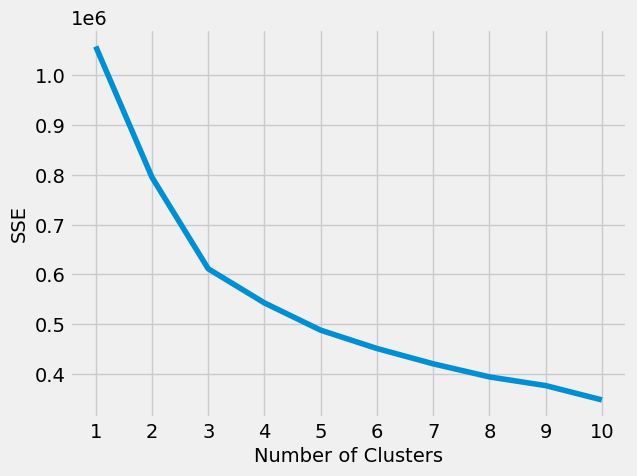

In [658]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [659]:
X = df_covid.drop("ALIVE_OR_DIED", axis=1)

# Convert DataFrame to matrix
#cmatrix = df_covid.values
# Using sklearn
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X) # cmatrix
# Get cluster assignment labels
labels = kmeans.labels_
# Format results as a DataFrame
results = pd.DataFrame(data=labels, columns=['cluster'], index=df_covid.index)
X['cluster'] = results['cluster']

/home/andsilva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [660]:
print(f"label clustering shape...: {results['cluster'].shape}")
print(f'X shape .................: {X.shape}')

label clustering shape...: (1021977,)
X shape .................: (1021977, 10)


In [661]:
X

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,cluster
0,2,1,1,1,1.086957,2,1,2,3,1
1,2,1,1,1,1.391304,2,1,1,5,1
2,2,1,2,2,0.652174,1,2,2,3,1
3,2,1,1,2,0.565217,2,2,2,7,1
4,2,1,1,2,1.217391,1,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,1,2,0.000000,2,2,2,7,0
1048571,1,13,2,2,0.478261,2,1,2,7,0
1048572,2,13,1,2,0.652174,2,2,2,7,0
1048573,2,13,1,2,-0.521739,2,2,2,7,0


<Axes: ylabel='Count'>

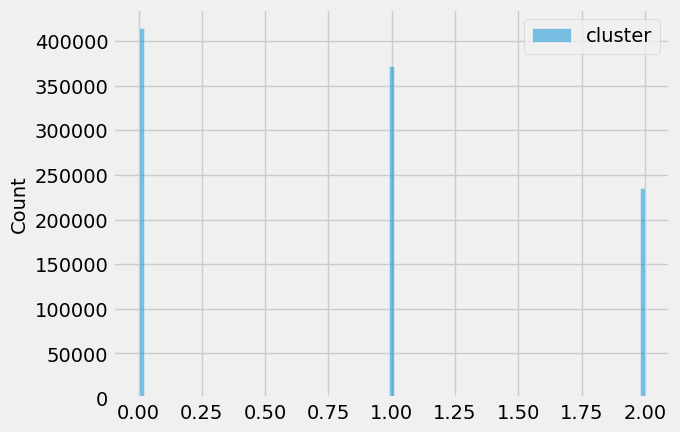

In [662]:
sns.histplot(data=results)

In [663]:
results.nunique()

cluster    3
dtype: int64

In [664]:
df_covid_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021977 entries, 0 to 1021976
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1021977 non-null  float64
 1   MEDICAL_UNIT          1021977 non-null  float64
 2   PATIENT_TYPE          1021977 non-null  float64
 3   PNEUMONIA             1021977 non-null  float64
 4   AGE                   1021977 non-null  float64
 5   DIABETES              1021977 non-null  float64
 6   HIPERTENSION          1021977 non-null  float64
 7   RENAL_CHRONIC         1021977 non-null  float64
 8   CLASIFFICATION_FINAL  1021977 non-null  float64
 9   ALIVE_OR_DIED         1021977 non-null  float64
dtypes: float64(10)
memory usage: 78.0 MB


In [665]:
column_names = list(df_covid_scaled.columns)
column_names.remove('ALIVE_OR_DIED')
column_names

['USMER',
 'MEDICAL_UNIT',
 'PATIENT_TYPE',
 'PNEUMONIA',
 'AGE',
 'DIABETES',
 'HIPERTENSION',
 'RENAL_CHRONIC',
 'CLASIFFICATION_FINAL']

In [666]:
X = df_covid_scaled.drop("ALIVE_OR_DIED", axis=1)
y = df_covid_scaled['ALIVE_OR_DIED']

# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.23, random_state=42, shuffle=True)

In [667]:
rfc = RandomForestClassifier(max_depth=15, random_state=42, n_jobs=-1) 

# fitting
rfc.fit(X_train, Y_train)
predictions = rfc.predict(X_validation)

# Evaluate predictions
print(f'score:....................: {round(accuracy_score(Y_validation, predictions), 4)*100} %')


score:....................: 93.97999999999999 %


Text(0.5, 0, 'Random Forest Feature Importance')

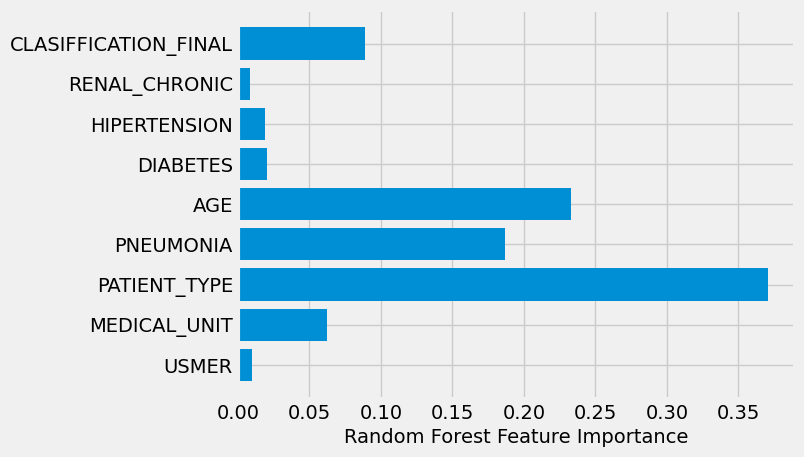

In [668]:
rfc.feature_importances_
plt.barh(column_names, rfc.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [669]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [670]:
## https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
## https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [671]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_validation)

In [672]:
# Evaluate predictions
print(f'score:....................: {round(accuracy_score(Y_validation, y_pred), 4)*100} %')

score:....................: 93.42 %


Text(0.5, 0, 'Decision Tree Classifier Feature Importance')

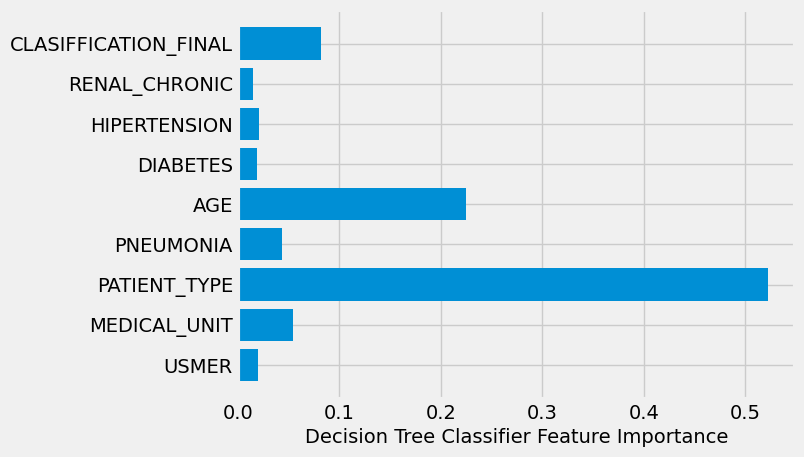

In [673]:
dtc.feature_importances_
plt.barh(column_names, dtc.feature_importances_)
plt.xlabel("Decision Tree Classifier Feature Importance")

In [674]:
#svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
#svc.fit(X_train, Y_train)
#
#y_pred = svc.predict(Y_validation)

In [675]:
# Evaluate predictions
# print(f'score:....................: {round(accuracy_score(Y_validation, y_pred), 4)*100} %')

In [676]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_validation)

In [677]:
# Evaluate predictions
print(f'score:....................: {round(accuracy_score(Y_validation, y_pred), 4)*100} %')

score:....................: 93.32000000000001 %


In [678]:
X = df_covid_scaled.drop("ALIVE_OR_DIED", axis=1)
y = df_covid_scaled['ALIVE_OR_DIED']

# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.23, random_state=42, shuffle=True)

In [679]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, Y_train)
gbc.score(X_validation, Y_validation)

0.939703473655102

In [680]:
# XGBoost
xgb_classifier = xgb.XGBClassifier(eta = 0.01)
xgb_classifier.fit(X_train, Y_train)

# prediction
y_pred = xgb_classifier.predict(X_validation)

# Evaluate predictions
print(f'score:....................: {round(accuracy_score(Y_validation, y_pred), 4)*100} %')

score:....................: 93.97 %


In [681]:
y_pred = rfc.predict(X_validation)
y_prob = rfc.predict_proba(X_validation)[:,1]

rfc_roc_auc = roc_auc_score(Y_validation, y_pred)
rfc_fpr, rfc_tpr, thresholds = roc_curve(Y_validation, y_prob)

In [682]:
y_pred = dtc.predict(X_validation)
y_prob = dtc.predict_proba(X_validation)[:,1]

dtc_roc_auc = roc_auc_score(Y_validation, y_pred)
dtc_fpr, dtc_tpr, thresholds = roc_curve(Y_validation, y_prob)

In [683]:
y_pred = knn.predict(X_validation)
y_prob = knn.predict_proba(X_validation)[:,1]

knn_roc_auc = roc_auc_score(Y_validation, y_pred)
knn_fpr, knn_tpr, thresholds = roc_curve(Y_validation, y_prob)

In [684]:
y_pred = gbc.predict(X_validation)
y_prob = gbc.predict_proba(X_validation)[:,1]

gbc_roc_auc = roc_auc_score(Y_validation, y_pred)
gbc_fpr, gbc_tpr, thresholds = roc_curve(Y_validation, y_prob)

In [685]:
y_pred = xgb_classifier.predict(X_validation)
y_prob = xgb_classifier.predict_proba(X_validation)[:,1]

xgb_roc_auc = roc_auc_score(Y_validation, y_pred)
xgb_fpr, xgb_tpr, thresholds = roc_curve(Y_validation, y_prob)

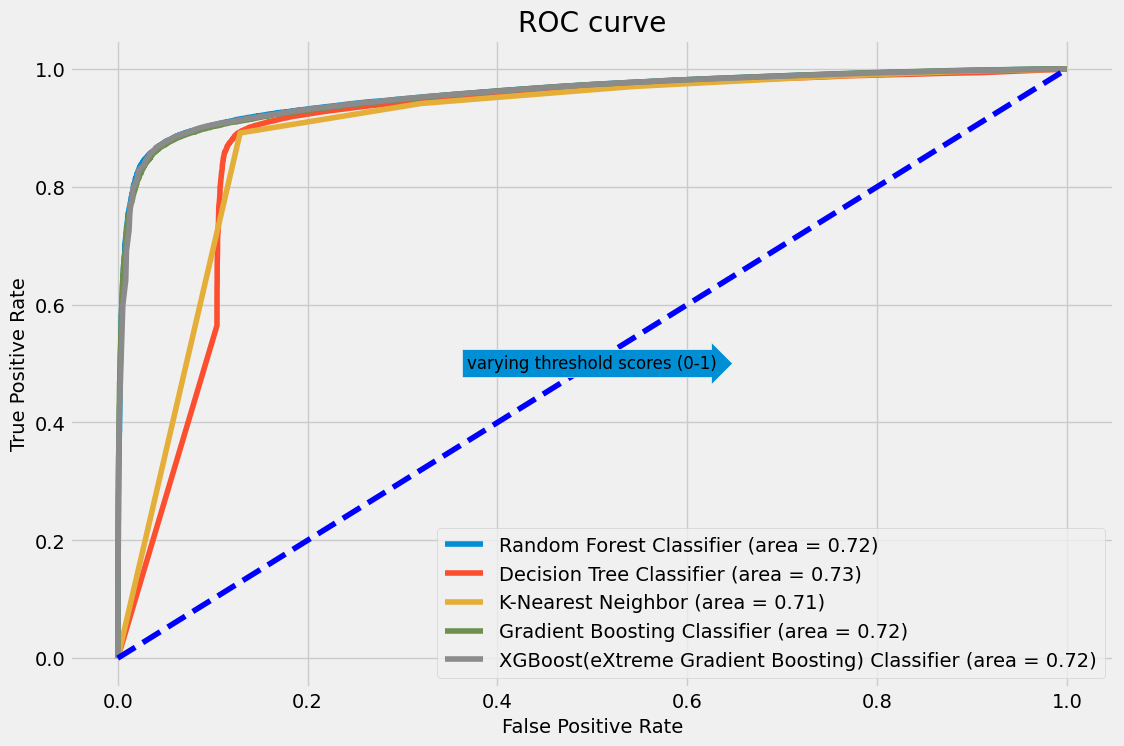

In [686]:
plt.figure(figsize = (12,8)) 
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier (area = %0.2f)' % rfc_roc_auc) 
plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree Classifier (area = %0.2f)' % dtc_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbor (area = %0.2f)' % knn_roc_auc)
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost(eXtreme Gradient Boosting) Classifier (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'b--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC curve') 
plt.legend(loc="lower right") 
plt.savefig('ROC_curves') 
plt.show()

In [687]:
column_names = df_covid_all.columns

In [688]:
df_covid_scaled = scaler.fit_transform(df_covid_all.to_numpy())
df_covid_scaled = pd.DataFrame(df_covid_scaled, columns=column_names)
df_covid_scaled

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,ALIVE_OR_DIED
0,1.0,0.0,0.0,0.0,0.979592,0.000000,0.537190,0.010309,0.010309,0.010309,...,0.010309,0.000000,0.010309,0.010309,0.010309,0.010309,0.010309,0.333333,0.979592,0.0
1,1.0,0.0,1.0,0.0,0.979592,0.000000,0.595041,0.989691,0.010309,0.010309,...,0.010309,0.000000,0.010309,0.010309,0.000000,0.000000,0.010309,0.666667,0.979592,0.0
2,1.0,0.0,1.0,1.0,0.000000,0.010204,0.454545,0.989691,0.000000,0.010309,...,0.010309,0.010309,0.010309,0.010309,0.010309,0.010309,0.010309,0.333333,0.010204,0.0
3,1.0,0.0,0.0,0.0,0.979592,0.010204,0.438017,0.010309,0.010309,0.010309,...,0.010309,0.010309,0.010309,0.010309,0.010309,0.010309,0.010309,1.000000,0.979592,0.0
4,1.0,0.0,1.0,0.0,0.979592,0.010204,0.561983,0.989691,0.000000,0.010309,...,0.010309,0.000000,0.010309,0.010309,0.010309,0.010309,0.010309,0.333333,0.979592,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.0,1.0,1.0,0.0,0.979592,0.010204,0.330579,0.989691,0.010309,0.010309,...,0.010309,0.010309,0.010309,0.010309,0.010309,0.010309,0.010309,1.000000,0.979592,1.0
1048571,0.0,1.0,1.0,1.0,0.010204,0.010204,0.421488,0.989691,0.010309,0.010309,...,0.010309,0.000000,0.010309,0.010309,0.010309,0.010309,0.010309,1.000000,0.010204,1.0
1048572,1.0,1.0,1.0,0.0,0.979592,0.010204,0.454545,0.989691,0.010309,0.010309,...,0.010309,0.010309,0.010309,0.010309,0.010309,0.010309,0.010309,1.000000,0.979592,1.0
1048573,1.0,1.0,1.0,0.0,0.979592,0.010204,0.231405,0.989691,0.010309,0.010309,...,0.010309,0.010309,0.010309,0.010309,0.010309,0.010309,0.010309,1.000000,0.979592,1.0


In [689]:
X = df_covid_scaled.drop("ALIVE_OR_DIED", axis=1)
y = df_covid_scaled['ALIVE_OR_DIED']

kfeatures_score = {}
ks = []
scores = []

for kfeatures in range(5,20):
    X_selected = SelectKBest(f_classif, k=kfeatures).fit_transform(X, y)
    
    # Split-out validation dataset
    X_train, X_validation, Y_train, Y_validation = train_test_split(X_selected, y, test_size=0.2, random_state=1)
    
    model = RandomForestClassifier(max_depth=15, random_state=0, n_jobs=-1) 

    # fitting
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    
    score = round(accuracy_score(Y_validation, predictions), 4)*100
    
    ks.append(kfeatures)
    scores.append(score)
    
    # Evaluate predictions
    print(f'({kfeatures} features) score:....................: {score} %')
    
kfeatures_score['kfeatures'] = ks
kfeatures_score['scores']= scores

(5 features) score:....................: 94.88 %
(6 features) score:....................: 94.91000000000001 %
(7 features) score:....................: 94.94 %
(8 features) score:....................: 94.95 %
(9 features) score:....................: 94.95 %
(10 features) score:....................: 95.0 %
(11 features) score:....................: 95.00999999999999 %
(12 features) score:....................: 94.99 %
(13 features) score:....................: 95.0 %
(14 features) score:....................: 94.98 %
(15 features) score:....................: 95.0 %
(16 features) score:....................: 95.03 %
(17 features) score:....................: 95.02000000000001 %
(18 features) score:....................: 95.17999999999999 %
(19 features) score:....................: 95.17999999999999 %


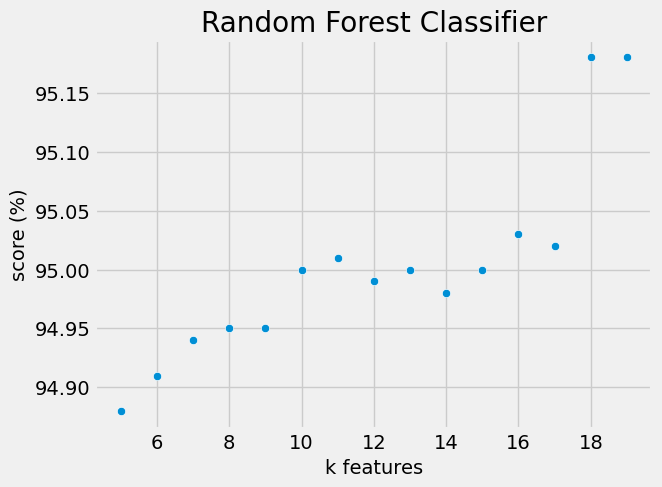

In [690]:
kfeaturescore = pd.DataFrame.from_dict(kfeatures_score)
sns.scatterplot(data=kfeaturescore, x="kfeatures", y="scores")

plt.xlabel('k features') 
plt.ylabel('score (%)') 
plt.title('Random Forest Classifier') 
plt.savefig('kselectfeatureRFC.png') 
plt.show()

In [691]:
X = df_covid_scaled.drop("ALIVE_OR_DIED", axis=1)
y = df_covid_scaled['ALIVE_OR_DIED']

pca_perc = {}
ks = []
scores = []
percentage =0.69

for perc in range(0,4):
    
    # Create a PCA that will retain percentage of variance
    pca = PCA(n_components=percentage, whiten=True)
    
    percentage = percentage + 0.1
    
    features_pca = pca.fit_transform(X)
    
    # get the number of features selected by PCA.
    kfeatures = features_pca.shape[1]
    
    # Split-out validation dataset
    X_train, X_validation, Y_train, Y_validation = train_test_split(features_pca, y, test_size=0.2, random_state=1)
    
    # def model
    model = RandomForestClassifier(max_depth=15, random_state=0, n_jobs=-1, n_estimators=500) 

    # fitting
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    
    # performance model
    score = round(accuracy_score(Y_validation, predictions), 4)*100
    
    ks.append(kfeatures)
    scores.append(score)
    
    # Evaluate predictions
    print(f'({kfeatures} features) score:....................: {score} %')
    
kfeatures_score['kfeatures'] = ks
kfeatures_score['scores']= scores

(3 features) score:....................: 94.52000000000001 %
(3 features) score:....................: 94.52000000000001 %
(5 features) score:....................: 94.86 %
(8 features) score:....................: 94.87 %


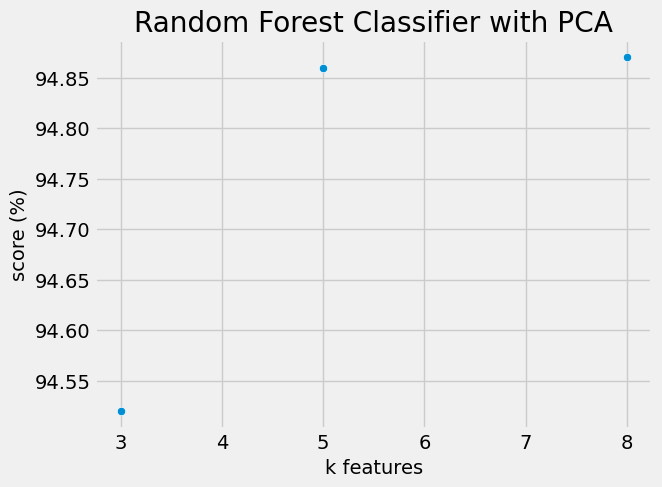

In [692]:
kfeaturescore = pd.DataFrame.from_dict(kfeatures_score)
sns.scatterplot(data=kfeaturescore, x="kfeatures", y="scores")

plt.xlabel('k features') 
plt.ylabel('score (%)') 
plt.title('Random Forest Classifier with PCA') 
plt.savefig('kselectfeatureRFC_with_PCA.png') 
plt.show()

In [693]:
#cat_model = CatBoostClassifier(
#    iterations = 250, # 1000 are ideal
#    loss_function='MultiClass',
#    bootstrap_type = "Bayesian",
#    eval_metric = 'MultiClass',
#    leaf_estimation_iterations = 100,
#    random_strength = 0.5,
#    depth = 7,
#    l2_leaf_reg = 5,
#    learning_rate=0.1,
#    bagging_temperature = 0.5,
#    thread_count=-1 # number of threads, setted all CPU cores
#    #task_type = "GPU",
#)

In [694]:
# training the model
#cat_model.fit(X_train,Y_train)

In [695]:
# predicting the model output
#y_pred_cat = cat_model.predict(X_validation)
#printing the accuracy of the tuned model
#print("accuracy of the catboost: ", round(accuracy_score(Y_validation,y_pred_cat), 4)*100, "%")

In [696]:
## https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

## https://towardsdatascience.com/how-to-train-a-classification-model-with-tensorflow-in-10-minutes-fd2b7cfba86

In [697]:
#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(128, activation='relu'),
#    tf.keras.layers.Dense(256, activation='relu'),
#    tf.keras.layers.Dense(256, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])
#
#model.compile(
#    loss=tf.keras.losses.binary_crossentropy,
#    optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
#    metrics=[
#        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#        tf.keras.metrics.Precision(name='precision'),
#        tf.keras.metrics.Recall(name='recall')
#    ]
#)
#
#history = model.fit(X_train, Y_train, epochs=20)

In [698]:
#rcParams['figure.figsize'] = (18, 8)
#rcParams['axes.spines.top'] = False
#rcParams['axes.spines.right'] = False

In [699]:
#plt.plot(
#    np.arange(1, 101), 
#    history.history['loss'], label='Loss'
#)
#plt.plot(
#    np.arange(1, 101), 
#    history.history['accuracy'], label='Accuracy'
#)
#plt.plot(
#    np.arange(1, 101), 
#    history.history['precision'], label='Precision'
#)
#plt.plot(
#    np.arange(1, 101), 
#    history.history['recall'], label='Recall'
#)
#plt.title('Evaluation metrics', size=20)
#plt.xlabel('Epoch', size=14)
#plt.legend();

In [700]:
#predictions = model.predict(Y_validation)
#
#prediction_classes = [
#    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
#]

In [701]:
#from sklearn.metrics import confusion_matrix
#
#print(confusion_matrix(y_test, prediction_classes))

In [702]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score
#
#print(f'Accuracy: {accuracy_score(Y_validation, prediction_classes):.2f}')
#print(f'Precision: {precision_score(Y_validation, prediction_classes):.2f}')
#print(f'Recall: {recall_score(Y_validation, prediction_classes):.2f}')

In [703]:
#https://medium.com/@24littledino/xgboost-classification-in-python-f29cc2c50a9b

In [704]:
# XGBoost (different learning rate)
#learning_rate_range = np.arange(0.01, 1, 0.05)
#test_XG = [] 
#train_XG = []
#for lr in learning_rate_range:
#    xgb_classifier = xgb.XGBClassifier(eta = lr)
#    xgb_classifier.fit(X_train, Y_train)
#    train_XG.append(xgb_classifier.score(X_train, Y_train))
#    test_XG.append(xgb_classifier.score(X_validation, Y_validation))

In [705]:
#fig = plt.figure(figsize=(10, 7))
#plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
#plt.plot(learning_rate_range, test_XG, c='m', label='Test')
#plt.xlabel('Learning rate')
#plt.xticks(learning_rate_range)
#plt.ylabel('Accuracy score')
#plt.ylim(0.9, 1)
#plt.legend(prop={'size': 12}, loc=3)
#plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
#plt.show()

In [706]:
# new learning rate range
#learning_rate_range = np.arange(0.01, 0.5, 0.05)
#fig = plt.figure(figsize=(19, 17))
#idx = 1
## grid search for min_child_weight
#for weight in np.arange(0, 4.5, 0.5):
#    train = []
#    test = []
#    for lr in learning_rate_range:
#        xgb_classifier = xgb.XGBClassifier(eta = lr, reg_lambda=1, min_child_weight=weight)
#        xgb_classifier.fit(X_train, Y_train)
#        train.append(xgb_classifier.score(X_train, Y_train))
#        test.append(xgb_classifier.score(X_train, Y_train))
#    fig.add_subplot(3, 3, idx)
#    idx += 1
#    plt.plot(learning_rate_range, train, c='orange', label='Training')
#    plt.plot(learning_rate_range, test, c='m', label='Testing')
#    plt.xlabel('Learning rate')
#    plt.xticks(learning_rate_range)
#    plt.ylabel('Accuracy score')
#    plt.ylim(0.92, 1)
#    plt.legend(prop={'size': 12}, loc=3)
#    title = "Min child weight:" + str(weight)
#    plt.title(title, size=16)
#plt.show()